In [195]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from skimage.transform import resize

In [3]:
df = pd.read_csv('forestfires.csv')

In [65]:
df.sort_values('area',ascending=False)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
238,6,5,11,2,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84
415,8,6,1,4,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28
479,7,4,5,1,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53
237,1,2,11,5,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88
236,2,2,11,2,92.5,121.1,674.4,8.6,18.2,46,1.8,0.0,200.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,3,4,7,2,91.7,35.8,80.8,7.8,11.6,30,6.3,0.0,0.00
115,3,5,7,5,88.1,25.7,67.6,3.8,15.5,27,6.3,0.0,0.00
114,3,4,7,5,88.1,25.7,67.6,3.8,15.8,27,7.6,0.0,0.00
113,3,4,11,1,91.8,78.5,724.3,9.2,18.9,35,2.7,0.0,0.00


In [7]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [54]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [55]:
df['month'] = encoder.fit_transform(df['month'])
df['day'] = encoder.fit_transform(df['day'])

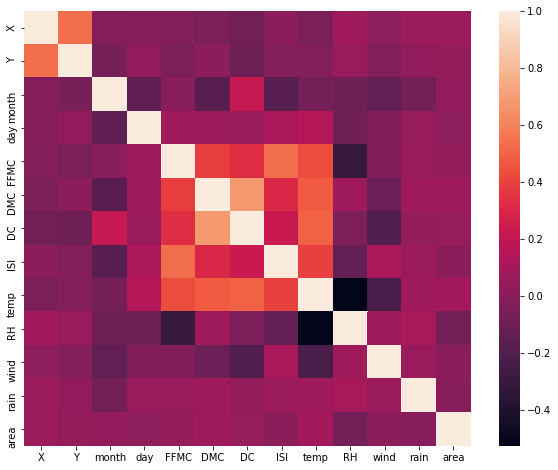

In [56]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

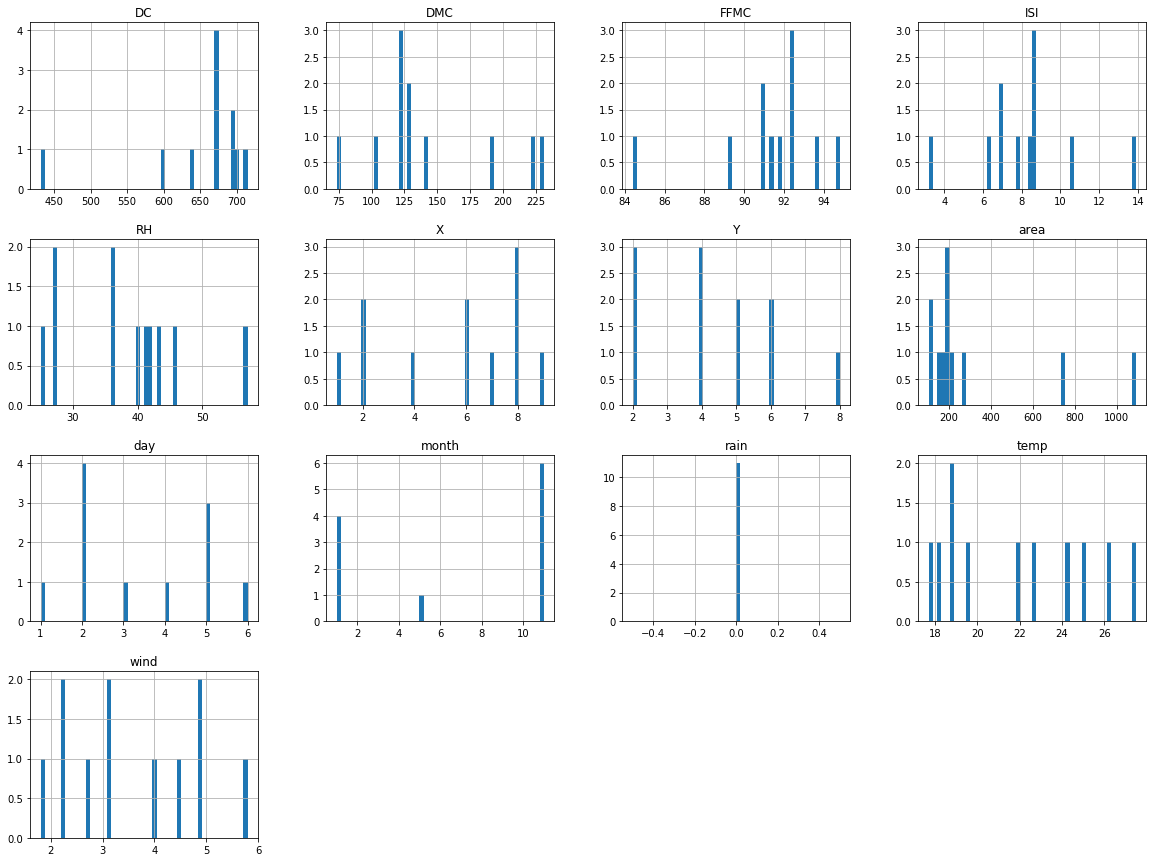

In [74]:
df[df.area > 100].hist(bins=50,figsize=(20,15))
plt.show()

In [112]:
from sklearn.tree import ExtraTreeRegressor

In [139]:
area_model = ExtraTreeRegressor()

In [172]:
feature_area_data = df[['FFMC','temp']].values
label_area_data = df['area'].values

In [173]:
area_model.fit(feature_area_data, label_area_data)
area_model.score(feature_area_data, label_area_data)

0.9967457975334525

In [180]:
feature_x_data = df[['FFMC','temp','area']].values
label_x_data = df['X'].values
x_model = ExtraTreeRegressor()
x_model.fit(feature_x_data, label_x_data)
x_model.score(feature_x_data, label_x_data)

0.9829860620005013

In [181]:
feature_y_data = df[['X','FFMC','temp']].values
label_y_data = df['Y'].values
y_model = ExtraTreeRegressor()
y_model.fit(feature_y_data, label_y_data)
y_model.score(feature_y_data, label_y_data)

0.9910317346245917

In [227]:
forest_map = io.imread('map.jpg')
forest_map = resize(forest_map, (1000,2000))

def Predict(FFMC,temp):
    area = area_model.predict([[FFMC,temp]])[0]
    x = x_model.predict([[FFMC,temp,area]])[0]
    y = y_model.predict([[x,FFMC,temp]])[0]
    return x,y,area

In [270]:
def ShowMeMap(x,y,area):
    x = 200 * x
    y = 100 * y
    fig = plt.figure(figsize=(10,8),dpi=150)
    ax = plt.subplot(111)
    ax.imshow(forest_map)
    ax.scatter([x],[y],s=2 * area, c='r', alpha=0.5, label='FIRE') 
    plt.xlabel(f"Fire Area : {area}")

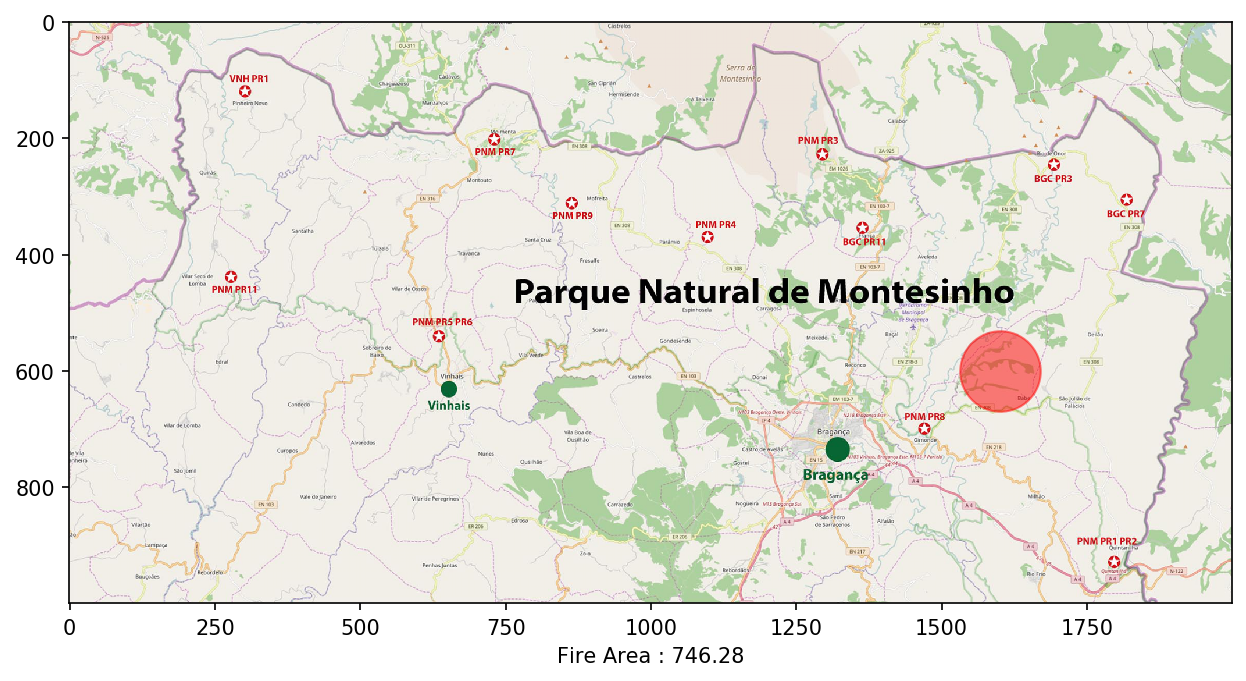

In [271]:
x,y,area = Predict(94.8,27.5)
ShowMeMap(x,y,area)